# Introdução
Você está trabalhando como analista da Zuber, uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. Sua tarefa é encontrar padrões nas informações disponíveis. Você quer entender as preferências dos passageiros e o impacto de fatores externos nas corridas.

Trabalhando com um banco de dados, você analisará dados de concorrentes e testará uma hipótese sobre o impacto do clima na frequência das viagens.

### Etapas feitas fora do Jupyter:

#### Importando os dados sobre o clima em Chicago em novembro de 2017 

In [4]:
# import pandas as pd
# import requests
# from bs4 import BeautifulSoup
# URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
# req = requests.get(URL)
# soup = BeautifulSoup(req.text, 'lxml')
# table = soup.find('table', attrs={"id": "weather_records"})
# heading_table = []
# for row in table.find_all('th'): #cabeçalho
#     heading_table.append(row.text)
# content = []
# for row in table.find_all('tr'): #para cada linha 'tr'
#     if not row.find_all('th'):
#         content.append([element.text for element in row.find_all('td')]) #célula 'td'
# weather_records = pd.DataFrame(content, columns=heading_table)
# print(weather_records)

#### Trabalhando com SQL


- 1) Número de corridas de táxi para cada empresa de táxi de 15 a 16 de novembro de 2017

In [6]:
# SELECT
#     cabs.company_name AS company_name,
#     COUNT(trips.trip_id) AS trip_amount
# FROM
#     cabs INNER JOIN
#     trips ON trips.cab_id = cabs.cab_id
# WHERE
#     CAST(start_ts AS date) BETWEEN '2017-11-15' AND '2017-11-16'
# GROUP BY
#     company_name
# ORDER BY
#     COUNT(trips.trip_id) DESC;

- 2) Número de corridas para cada empresa de táxi cujo nome contém as palavras "Amarelo" ou "Azul" de 1 a 7 de novembro de 2017.

In [7]:
# SELECT 
#     cabs.company_name AS company_name, 
#     COUNT(trips.trip_id) AS trips_amount
# FROM
#     trips INNER JOIN
#     cabs ON cabs.cab_id = trips.cab_id
# WHERE
#     cabs.company_name LIKE '%%Yellow%%'
#     AND CAST(trips.start_ts AS date) bETWEEN '2017-11-01' AND '2017-11-07'
# GROUP BY
#     cabs.company_name
# UNION ALL
# SELECT 
#     cabs.company_name AS company_name, 
#     COUNT(trips.trip_id) AS trips_amount
# FROM
#     trips INNER JOIN
#     cabs ON cabs.cab_id = trips.cab_id
# WHERE
#     cabs.company_name LIKE '%%Blue%%'
#     AND CAST(trips.start_ts AS date) bETWEEN '2017-11-01' AND '2017-11-07'
# GROUP BY 
#     company_name;

- 3) Número de corridas para as empresas Flash Cab e Taxi Affiliation Services, juntando as corridas de todas as outras empresas no grupo "Outros"

In [ ]:
# SELECT
#     CASE
#         WHEN cabs.company_name = 'Flash Cab' THEN 'Flash Cab'
#         WHEN cabs.company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
#         ELSE 'Other'
#         END AS company,
#     COUNT(trips.trip_id) AS trips_amount
# FROM
#     trips INNER JOIN
#     cabs ON cabs.cab_id = trips.cab_id
# WHERE
#     CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
# GROUP BY
#     company
# ORDER BY
#     COUNT(trips.trip_id) DESC;

- 4) Identificadores dos bairros O'Hare e Loop da tabela neighborhoods


In [ ]:
# SELECT 
#     neighborhood_id,
#     name
# FROM
#     neighborhoods
# WHERE
#     name LIKE '%Hare' OR name LIKE 'Loop';

- 5) Para cada hora, os registros de condições climáticas da tabela weather_records,  dividindo todas as horas em dois grupos: Bad (se o campo descrição contiver as palavras rain ou storm) e Good para outros.


In [ ]:
# SELECT
#     ts,
#     CASE
#         WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
#         ELSE 'Good'
#     END AS weather_conditions
# FROM 
#     weather_records;

- 6) Todas as corridas que começaram no Loop em um sábado e terminaram em O'Hare - condições meteorológicas para cada corrida e a duração de cada corrida

In [8]:
# SELECT
#     start_ts,
#     T.weather_conditions,
#     duration_seconds
# FROM 
#     trips INNER JOIN (
#     SELECT
#         ts,
#         CASE
#             WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
#             ELSE 'Good'
#         END AS weather_conditions
#     FROM 
#         weather_records
#     ) T on T.ts = trips.start_ts
# WHERE
#     EXTRACT(DOW from trips.start_ts) = 6 AND pickup_location_id = 50 
#     AND dropoff_location_id = 63
# ORDER BY
#     trip_id;

## Inicialização

In [1]:
import pandas as pd
from scipy import stats as st

## Carregar dados

In [2]:
taxi_company = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_location = pd.read_csv('/datasets/project_sql_result_04.csv')

## Explore os dados iniciais

Descrição dos dados:

taxi_company:
- `company_name`: nome da empresa de táxi
- `trips_amount`: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

dropoff_location:
- `dropoff_location_name`: bairros de Chicago onde as corridas terminaram
- `average_trips`: o número médio de viagens que terminaram em cada bairro em novembro de 2017.

### Taxi_company

In [3]:
taxi_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
taxi_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
taxi_company.duplicated().sum()

0

Possui 64 linhas e 2 colunas.
- Não há valores ausentes. 
- Não há valores duplicados.
- Os tipos de dados das 2 colunas está correto.

Não há correções a serem feitas nesse dataframe.

### Dropoff_location


In [6]:
dropoff_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
dropoff_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
dropoff_location.duplicated().sum()

0

Possui 94 linhas e 2 colunas.

- Não há valores ausentes.
- Não há valores duplicados.
- Os tipos de dados das 2 colunas está correto.

Não há correções a serem feitas nesse dataframe.

### loop_trip

In [9]:
loop_trip = pd.read_csv('/datasets/project_sql_result_07.csv')

Descrição loop_trip: Ele contém dados sobre viagens do Loop para o Aeroporto Internacional O'Hare.
- `start_ts` — data e hora do começo da corrida
- `weather_conditions` — condições meteorológicas no momento em que a corrida começou
- `duration_seconds` — duração da viagem em segundos

In [10]:
loop_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


A coluna 'start_ts' deveria ser do tipo datetime.

In [11]:
loop_trip.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [12]:
loop_trip.duplicated().sum()

197

Possui 197 dados duplicados.

In [13]:
# Removendo duplicatas
loop_trip = loop_trip.drop_duplicates()

In [14]:
# Conferindo se funcionou
loop_trip.duplicated().sum()

0

In [15]:
loop_trip['start_ts'] = pd.to_datetime(loop_trip['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [16]:
loop_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


Possui 3 colunas e 871 linhas após a remoção dos dados duplicados
- Não possui valores ausentes
- Os 197 dados duplicados foram removidos
- Os tipos de dados estavam corretos, exceto a coluna 'start_ts' que foi corrigida.

## Análise dos dados

In [17]:
# 10 principais bairros
dropoff_location.head(10).sort_values(by='average_trips', ascending=False)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Os 10 principais bairros em termos de destinos são: 
- Loop
- River North
- Streeterville
- West Loop
- O'Hare
- Lake View	
- Grant Park	
- Museum Campus	
- Gold Coast
- Sheffield & DePaul

### Gráficos

<AxesSubplot:xlabel='company_name'>

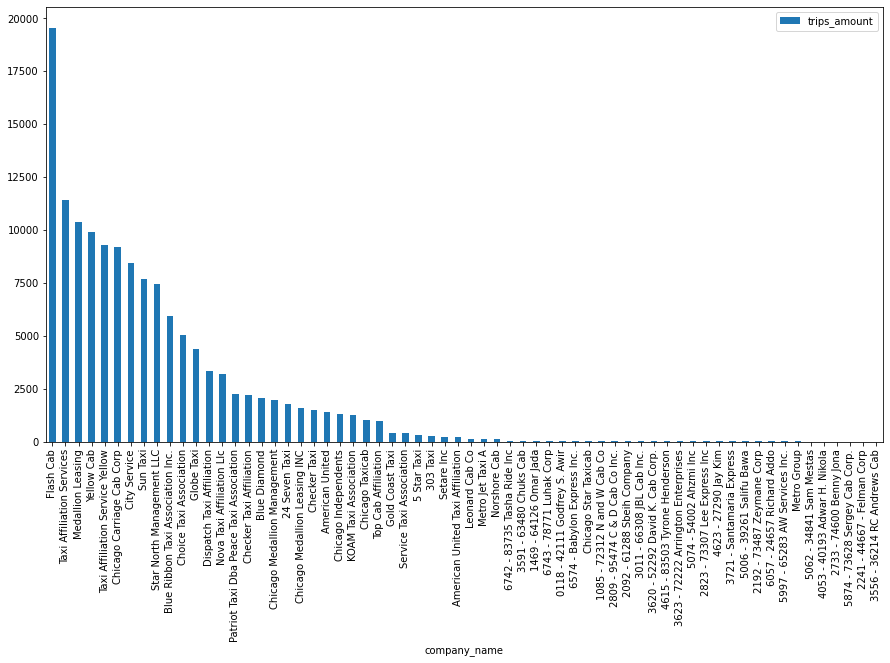

In [18]:
taxi_company.plot.bar(figsize=(15,8), x='company_name')

A empresa de taxis que mais fez viagens entre os dia 15 e 16 de novembro foi a Flash Cab, sendo quase o dobro em relação a segunda empresa que mais fez viagens. Acredito que esse padrão em que a Flash Cab faz mais viagens, não existe apenas nos dias 15 e 16 de novembro, mas no mês inteiro, sendo a empresa preferida das pessoas. 

<AxesSubplot:xlabel='dropoff_location_name'>

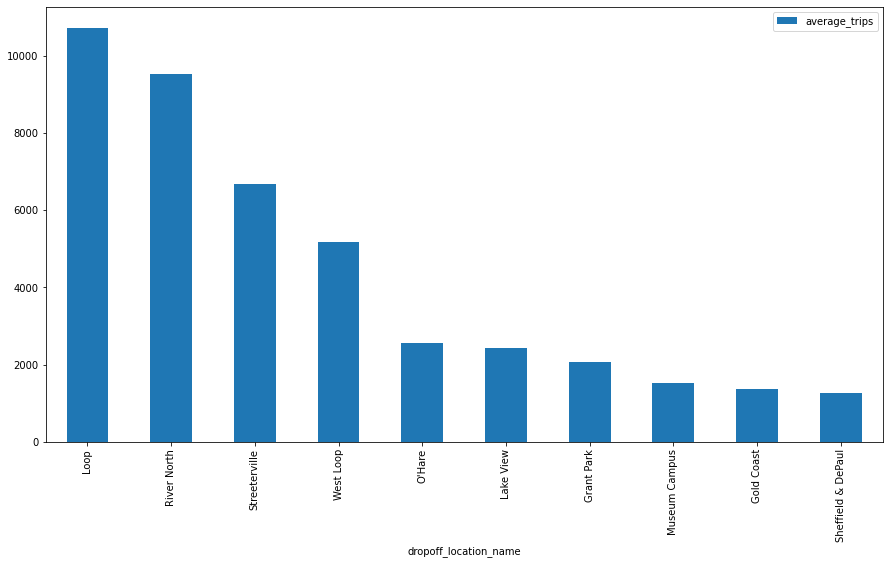

In [19]:
location_10 = dropoff_location.head(10).sort_values(by='average_trips', ascending=False)
location_10.plot.bar(figsize=(15,8), x='dropoff_location_name')

Assim como vimos acima, Loop é o bairro de destino mais frequentado, seguido do River North, Streeterville e Wet Loop, com médias acima de 5000. A média do restante dos bairros é menor que 3000.

## Testando Hipóteses

Nula: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda/é igual nos sábados chuvosos. 

Alternativa: contrária a nula, a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

In [20]:
loop_trip_bad = loop_trip.query('weather_conditions == "Bad"')
loop_trip_good = loop_trip.query('weather_conditions == "Good"')

In [21]:
loop_trip_bad = loop_trip_bad['duration_seconds']
loop_trip_good = loop_trip_good['duration_seconds']

In [22]:
loop_trip_bad.describe()

count     148.000000
mean     2409.229730
std       751.544705
min       480.000000
25%      1746.000000
50%      2463.500000
75%      2940.000000
max      4980.000000
Name: duration_seconds, dtype: float64

Se as variâncias das populações estatísticas das quais as amostras são retiradas forem aproximadamente iguais equal_var=True; senão equal_var=False

In [23]:
# Variância bad
751.544705 * 751.544705

564819.443613537

In [24]:
loop_trip_good.describe()

count     723.000000
mean     2032.253112
std       773.444860
min         0.000000
25%      1435.500000
50%      1883.000000
75%      2491.500000
max      7440.000000
Name: duration_seconds, dtype: float64

In [25]:
#Variância good
773.444860 * 773.444860

598216.9514604196

In [26]:
results = st.ttest_ind(loop_trip_bad, loop_trip_good, equal_var=True)
print('p-value: ', results.pvalue)

p-value:  7.397770692813604e-08


In [27]:
alpha = 0.05
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós rejeitamos a hipótese nula


Nós rejeitamos a hipótese de que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda/é igual nos sábados chuvosos; ela muda, pois dias chuvosos tendem a ter muito mais trânsito que dias ensolarados ou nublados.

## Conclusão Geral

#### Importando dados
Iniciei esse projeto importando os dados sobre o clima em Chicago em novembro de 2017 do site "https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html", usando a biblioteca requests e BeautifulSoup.

#### Análise Exploratória com SQL
Em seguida, fui para a análise exploratória dos dados usando SQL, com as seguinte tabelas:
Tabela neighborhoods: dados sobre os bairros da cidade
- nome: nome do bairro
- neighborhood_id: código do bairro

Tabela cabs: dados sobre os táxis
- cab_id: código do veículo
- vehicle_id: a identificação técnica do veículo
- company_name: a empresa proprietária do veículo

Tabela trips: dados sobre corridas
- trip_id: código da corrida
- cab_id: código do veículo que opera a corrida
- start_ts: data e hora do início da corrida (tempo arredondado para a hora)
- end_ts: data e hora do fim da corrida (tempo arredondado para a hora)
- duration_seconds: duração da corrida em segundos
- distance_miles: distância do percurso em milhas
- pickup_location_id: código do bairro de retirada
- dropoff_location_id: código do bairro de entrega

Tabela weather_records: dados sobre o clima
- record_id: código de registro meteorológico
- ts: gravar data e hora (tempo arredondado para a hora)
- temperatura: temperatura quando o registro foi feito
- descrição: breve descrição das condições meteorológicas, ex. "chuva leve" ou "nuvens esparsas"

Com essas tabelas:
- Encontrei o número de corridas de táxi para cada empresa de táxi de 15 a 16 de novembro de 2017;
- Encontrei o número de corridas para cada empresa de táxi cujo nome contém as palavras "Amarelo" ou "Azul" de 1º a 7 de novembro de 2017; 
- Sabendo que em novembro de 2017, as empresas de táxi mais populares eram Flash Cab e Taxi Affiliation Services, encontrei o número de corridas para essas duas empresas.
- Recuperei os identificadores dos bairros O'Hare e Loop da tabela neighborhoods;
- Para cada hora, recuperei os registros de condições meteorológicas da tabela weather_records e dividi todas as horas em dois grupos: "Bad" se o campo description contiver as palavras "rain" (chuva) ou "storm" (tempestade) e "Good" para outros. 
- Recuperei da tabela trips todos as corridas que começaram no Loop e terminaram em O'Hare em um sábado.

#### Análise Exploratória com Python
Com os dados obtidos anteriormente, comecei a análise com Python.

Iniciei importando as bibliotecas pandas e seaborn e carregando os resultados obtidos a partir do SQL. 

Em seguida, procurei por problemas nos dados. Os dataframes taxi_company e dropoff_locarion não possuiam dados ausentes nem duplicados, e estavam com os tipos de dados corretos.

O dataframe loop_trip, possuia 197 dados duplicados que foram removidos e a coluna 'start_ts', que estava no tipo object, foi alterada para o tipo datetime.

A partir disso, identifiquei os 10 principais bairros em termos de destinos e fiz gráficos para análise ("empresas de táxi e número de corridas"; e "10 principais bairros por número de corridas em que esse - bairro é destino"), chegando a conclusão que:
- A empresa de taxis que mais fez viagens entre os dia 15 e 16 de novembro foi a Flash Cab, sendo quase o dobro em relação a segunda empresa que mais fez viagens. Acredito que esse padrão em que a Flash Cab faz mais viagens, não existe apenas nos dias 15 e 16 de novembro, mas no mês inteiro, sendo a empresa preferida das pessoas.
- Loop é o bairro de destino mais frequentado, seguido do River North, Streeterville e Wet Loop, com médias acima de 5000. A média do restante dos bairros é menor que 3000.

Preferências dos passageiros:
- A empresa de taxis Flash Cab 
- Destino: bairro Loop

Impacto de fatores externos nas corridas:
- Dias chuvosos possuem a média de duração muito maior que dias não chuvosos.

#### Testando a hipótese 
Ao testar a hipótese:
- Nós rejeitamos a hipótese de que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda/é igual nos sábados chuvosos; ela muda, pois dias chuvosos tendem a ter muito mais trânsito que dias ensolarados ou nublados.